## Librerias a utilizar 

In [145]:
using Pkg
using CSV
using Distributions
using DataFrames
using Dates
using Plots
using Random
using LinearAlgebra
using LaTeXStrings
using Lasso
using GLMNet
using HDMjl
using StatsModels

## Pregunta 1

In [146]:
data= CSV.read(
        download("https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/data/wage2015_subsample_inference.csv"),
        DataFrame,
        types = Dict(:occ2 => String, :ind2 => String)
);

In [147]:
data = select(data, Not(["wage", "rownames"]));

In [148]:
control_formula =@formula(lwage ~ 1 + (exp1 + exp2 + exp3 + exp4) * (hsg + scl + ad + so + we +sex + ne + occ2 + ind2) + (hsg + scl + sex + ad) * (so + we + ne + occ2 + ind2) + (so + we + ne) * (occ2 + ind2) + occ2 * ind2);

control_frame = ModelFrame(control_formula, data);

control_frame

ModelFrame{@NamedTuple{lwage::Vector{Float64}, exp1::Vector{Float64}, exp2::Vector{Float64}, exp3::Vector{Float64}, exp4::Vector{Float64}, hsg::Vector{Float64}, scl::Vector{Float64}, ad::Vector{Float64}, so::Vector{Float64}, we::Vector{Float64}, sex::Vector{Float64}, ne::Vector{Float64}, occ2::PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}, ind2::PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}}, StatisticalModel}(lwage ~ 1 + exp1 + exp2 + exp3 + exp4 + hsg + scl + ad + so + we + sex + ne + occ2 + ind2 + exp1 & hsg + exp1 & scl + exp1 & ad + exp1 & so + exp1 & we + exp1 & sex + exp1 & ne + exp1 & occ2 + exp1 & ind2 + exp2 & hsg + exp2 & scl + exp2 & ad + exp2 & so + exp2 & we + exp2 & sex + exp2 & ne + exp2 & occ2 + exp2 & ind2 + exp3 & hsg + exp3 & scl + exp3 & ad + exp3 & so + exp3 & we + exp3 & sex + exp3 & ne + exp3 & occ2 + exp3 & ind2 + exp4 & hsg + exp4 & scl + exp4 & ad + exp4 & so + exp4 & we + exp4 & sex + exp4 & ne + exp4 & occ2 + exp4 & ind2 + hsg & so +

In [149]:
control_names = coefnames(control_frame);

In [150]:
control_matrix=modelmatrix(control_frame);

In [151]:
control_matrix_df = DataFrame(control_matrix, :auto);

In [152]:
control_matrix_df

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1.0,7.0,0.49,0.343,0.2401,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
2,1.0,31.0,9.61,29.791,92.3521,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
3,1.0,18.0,3.24,5.832,10.4976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,⋯
4,1.0,25.0,6.25,15.625,39.0625,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
5,1.0,22.0,4.84,10.648,23.4256,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
6,1.0,1.0,0.01,0.001,0.0001,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
7,1.0,42.0,17.64,74.088,311.17,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,42.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Variables de control 

In [153]:
rename!(control_matrix_df, Dict(zip(names(control_matrix_df), control_names)))

Row,(Intercept),exp1,exp2,exp3,exp4,hsg,scl,ad,so,we,sex,ne,occ2: 10,occ2: 11,occ2: 12,occ2: 13,occ2: 14,occ2: 15,occ2: 16,occ2: 17,occ2: 18,occ2: 19,occ2: 2,occ2: 20,occ2: 21,occ2: 22,occ2: 3,occ2: 4,occ2: 5,occ2: 6,occ2: 7,occ2: 8,occ2: 9,ind2: 11,ind2: 12,ind2: 13,ind2: 14,ind2: 15,ind2: 16,ind2: 17,ind2: 18,ind2: 19,ind2: 2,ind2: 20,ind2: 21,ind2: 22,ind2: 3,ind2: 4,ind2: 5,ind2: 6,ind2: 7,ind2: 8,ind2: 9,exp1 & hsg,exp1 & scl,exp1 & ad,exp1 & so,exp1 & we,exp1 & sex,exp1 & ne,exp1 & occ2: 10,exp1 & occ2: 11,exp1 & occ2: 12,exp1 & occ2: 13,exp1 & occ2: 14,exp1 & occ2: 15,exp1 & occ2: 16,exp1 & occ2: 17,exp1 & occ2: 18,exp1 & occ2: 19,exp1 & occ2: 2,exp1 & occ2: 20,exp1 & occ2: 21,exp1 & occ2: 22,exp1 & occ2: 3,exp1 & occ2: 4,exp1 & occ2: 5,exp1 & occ2: 6,exp1 & occ2: 7,exp1 & occ2: 8,exp1 & occ2: 9,exp1 & ind2: 11,exp1 & ind2: 12,exp1 & ind2: 13,exp1 & ind2: 14,exp1 & ind2: 15,exp1 & ind2: 16,exp1 & ind2: 17,exp1 & ind2: 18,exp1 & ind2: 19,exp1 & ind2: 2,exp1 & ind2: 20,exp1 & ind2: 21,exp1 & ind2: 22,exp1 & ind2: 3,exp1 & ind2: 4,exp1 & ind2: 5,exp1 & ind2: 6,exp1 & ind2: 7,exp1 & ind2: 8,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1.0,7.0,0.49,0.343,0.2401,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
2,1.0,31.0,9.61,29.791,92.3521,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
3,1.0,18.0,3.24,5.832,10.4976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,⋯
4,1.0,25.0,6.25,15.625,39.0625,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
5,1.0,22.0,4.84,10.648,23.4256,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
6,1.0,1.0

Tratamiento y su interacción con otras variables

In [154]:
model_treatment_design =@formula (lwage ~ -1 + clg +clg *(shs + hsg + scl + sex + mw + so + we + exp1 + exp2 + exp3 + exp4));

In [155]:
treatment_frame = ModelFrame(model_treatment_design, data);

In [156]:
treatment_names = coefnames(treatment_frame)

23-element Vector{Any}:
 "clg"
 "shs"
 "hsg"
 "scl"
 "sex"
 "mw"
 "so"
 "we"
 "exp1"
 "exp2"
 "exp3"
 "exp4"
 "clg & shs"
 "clg & hsg"
 "clg & scl"
 "clg & sex"
 "clg & mw"
 "clg & so"
 "clg & we"
 "clg & exp1"
 "clg & exp2"
 "clg & exp3"
 "clg & exp4"

In [157]:
treatment_matrix = modelmatrix(treatment_frame);

In [158]:
treatment_df = DataFrame(treatment_matrix, :auto );

In [159]:
rename!(treatment_df, Dict(zip(names(treatment_df), Symbol.(treatment_names))))

Row,clg,shs,hsg,scl,sex,mw,so,we,exp1,exp2,exp3,exp4,clg & shs,clg & hsg,clg & scl,clg & sex,clg & mw,clg & so,clg & we,clg & exp1,clg & exp2,clg & exp3,clg & exp4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.49,0.343,0.2401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.49,0.343,0.2401
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,9.61,29.791,92.3521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,9.61,29.791,92.3521
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,3.24,5.832,10.4976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,6.25,15.625,39.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,4.84,10.648,23.4256,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,4.84,10.648,23.4256
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.01,0.001,0.0001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.01,0.001,0.0001
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,42.0,17.64,74.088,311.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0,13.69,50.653,187.416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,31.0,9.61,29.791,92.3521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
interaction_cols = treatment_df[:,[occursin("clg",name) for name in names(treatment_df)]];

Combinando las matrices

In [161]:
X =hcat(treatment_df, control_matrix_df, makeunique=true)

Row,clg,shs,hsg,scl,sex,mw,so,we,exp1,exp2,exp3,exp4,clg & shs,clg & hsg,clg & scl,clg & sex,clg & mw,clg & so,clg & we,clg & exp1,clg & exp2,clg & exp3,clg & exp4,(Intercept),exp1_1,exp2_1,exp3_1,exp4_1,hsg_1,scl_1,ad,so_1,we_1,sex_1,ne,occ2: 10,occ2: 11,occ2: 12,occ2: 13,occ2: 14,occ2: 15,occ2: 16,occ2: 17,occ2: 18,occ2: 19,occ2: 2,occ2: 20,occ2: 21,occ2: 22,occ2: 3,occ2: 4,occ2: 5,occ2: 6,occ2: 7,occ2: 8,occ2: 9,ind2: 11,ind2: 12,ind2: 13,ind2: 14,ind2: 15,ind2: 16,ind2: 17,ind2: 18,ind2: 19,ind2: 2,ind2: 20,ind2: 21,ind2: 22,ind2: 3,ind2: 4,ind2: 5,ind2: 6,ind2: 7,ind2: 8,ind2: 9,exp1 & hsg,exp1 & scl,exp1 & ad,exp1 & so,exp1 & we,exp1 & sex,exp1 & ne,exp1 & occ2: 10,exp1 & occ2: 11,exp1 & occ2: 12,exp1 & occ2: 13,exp1 & occ2: 14,exp1 & occ2: 15,exp1 & occ2: 16,exp1 & occ2: 17,exp1 & occ2: 18,exp1 & occ2: 19,exp1 & occ2: 2,exp1 & occ2: 20,exp1 & occ2: 21,exp1 & occ2: 22,exp1 & occ2: 3,exp1 & occ2: 4,exp1 & occ2: 5,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.49,0.343,0.2401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.49,0.343,0.2401,1.0,7.0,0.49,0.343,0.2401,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,9.61,29.791,92.3521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,9.61,29.791,92.3521,1.0,31.0,9.61,29.791,92.3521,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,3.24,5.832,10.4976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,6.25,15.625,39.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,4.84,10.648,23.4256,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,4.84,10.648,23.4256,1.0,22.0,4.84,10.648,23.4256,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.01,0.001,0.0001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.01,0.001,0.0001,1.0,1.0,0.01,0.001,0.

In [162]:
X=select(X, Not(["(Intercept)"]));

In [163]:
Y = [data[:,1];;];

## Pregunta 2

In [164]:
function log_grid(lower::Int, upper::Int, log_step::Float64)
    log_grid = range(lower, stop=upper, length= Int(1 /log_step))
    return exp.(log_grid)
end

log_grid (generic function with 1 method)

Estableciendo los kflods manualmente 

In [165]:
function k_folds(data::AbstractArray, k:: Int = 5)
    mdl = size(data, 1) % k 
    floor = size(data, 1) ÷ k 

    if mdl == 
        trues == fill(1, floor, 1)
        split_matrix = kron(I(k), trues)
    else 
        trues_g1 = fill(1, floor + 1, 1)
        split_matrix_g1 = kron(I(mdl), trues_g1)
        
        trues_g2 = fill(1, floor, 1)
        split_matrix_g2 = kron(I(k - mdl), trues_g2)
        
        split_matrix = [split_matrix_g1  zeros(size(split_matrix_g1, 1), size(split_matrix_g2, 2));
                        zeros(size(split_matrix_g2, 1), size(split_matrix_g1, 2))  split_matrix_g2]
    end
    
        sm_bool = split_matrix .== 1
        splits = [sm_bool[:, x] for x in 1:k]
                    
        return splits
end

k_folds (generic function with 2 methods)

Definiendo la función que encontrará el lambda óptimo

In [166]:
function optimal_lambda(Y::AbstractVector, X::AbstractArray, lambda_bounds::Tuple{Int, Int}, k::Int = 5; niter::Int = 100)
    Y = vec(Y) 

    if ndims(X) == 1
        X = reshape(X, :, 1)
    end

    folds = k_folds(X, k)
    all_lambdas = log_grid(lambda_bounds[1],lambda_bounds[2], 1/niter)
    all_mse = zeros(niter)

    for (j, l) in enumerate(all_lambdas)
        split_pes = zeros(k)
        
        for i in 1:k
            X_train = X[.!folds[i], :]
            X_test = X[folds[i], :]
            y_train = Y[.!folds[i]]
            y_test = Y[folds[i]]

            model = glmnet(X_train, y_train, alpha=1.0, lambda=[l])
            predict = GLMNet.predict(model, X_test)

            pe = sum((y_test - predict).^2)
            split_pes[i] = pe
        end

        all_mse[j] = mean(split_pes)
    end

    selected = argmin(all_mse)
    optimal_lambda = all_lambdas[selected]
    optimal_model = glmnet(X, Y, alpha=1.0, lambda=[optimal_lambda])
    optimal_coef = [optimal_model.a0;optimal_model.betas[:]]

    output = Dict(
        "optimal_lambda" => optimal_lambda,
        "optimal_coef" => optimal_coef,
        "all_lambdas" => all_lambdas,
        "all_mse" => all_mse
    )

    return output
end

optimal_lambda (generic function with 2 methods)

In [167]:
function predict_model(optimal_model::Dict, X::AbstractArray)
    intercept = ones(size(X, 1), 1)
    Z = [intercept;; X]
    
    return Z * optimal_model["optimal_coef"]
end

predict_model (generic function with 1 method)

Encontrando el lambda óptimo

In [168]:
X_matrix = Matrix(treatment_df)

5150×23 Matrix{Float64}:
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0   7.0  0.49   0.343   0.2401
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  31.0  9.61  29.791  92.3521
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  22.0  4.84  10.648  23.4256
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0   1.0  0.01   0.001   0.0001
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0   4.0  0.16   0.064   0.0256
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  …  0.0   0.0  0.0    0.0     0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.0
 0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0     0.0   0.0  0.0    0.0     0.

In [169]:
Y_vector = vec(Y)

5150-element Vector{Float64}:
 2.2633643798407643
 3.872802292274865
 2.403126322215923
 2.634927936273247
 3.361976668508874
 2.4622152385859297
 2.9565115604007097
 2.9565115604007097
 2.4849066497880004
 2.9565115604007097
 2.8511510447428834
 2.486507931154974
 2.486507931154974
 ⋮
 2.981204172991081
 3.0518217402050345
 3.818735071004589
 3.117779707996832
 2.822980167776187
 3.1796551117149194
 2.6280074934286737
 2.6925460145662448
 3.138833117194664
 3.649658740960655
 3.4955080611333966
 2.8511510447428834

In [170]:
model_lasso = optimal_lambda(Y_vector, X_matrix, (-7,7))

Dict{String, Any} with 4 entries:
  "optimal_coef"   => [3.19658, -0.109978, -0.718407, -0.621321, -0.468106, -0.…
  "all_mse"        => [285.276, 285.201, 285.145, 285.088, 285.025, 284.963, 28…
  "optimal_lambda" => 0.00497649
  "all_lambdas"    => [0.000911882, 0.0010504, 0.00120996, 0.00139375, 0.001605…

In [171]:
model_lasso["optimal_lambda"]

0.004976490759881519

Estableciendo el método de doble lasso

In [172]:
D = X[!, "clg"]

5150-element Vector{Float64}:
 1.0
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 1.0
 1.0
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0

In [173]:
W = select(X, Not(["clg"]))
W_matrix = Matrix(W)

5150×985 Matrix{Float64}:
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                       

In [174]:
Y_df = data[!, "lwage"]
Y_df = DataFrame([Y_df], [:Y_df])

Row,Y_df
,Float64
1,2.26336
2,3.8728
3,2.40313
4,2.63493
5,3.36198
6,2.46222
7,2.95651
8,2.95651
9,2.48491


In [175]:
lambda_values = [0.004976490759881519]

1-element Vector{Float64}:
 0.004976490759881519

In [176]:
Y_W = glmnet(W_matrix, Y_vector, alpha=1.0, lambda= lambda_values)

Least Squares GLMNet Solution Path (1 solutions for 985 predictors in 99 passes):
──────────────────────────────
      df   pct_dev           λ
──────────────────────────────
[1]  300  0.376809  0.00497649
──────────────────────────────

In [177]:
predict = GLMNet.predict(Y_W, W_matrix)

5150×1 Matrix{Float64}:
 2.7103533658776944
 3.5295956190597018
 2.8993396364151383
 3.743154876740074
 3.182629019283195
 3.0861251690556815
 3.08927664177146
 2.844345114305548
 2.5634559498556624
 3.133511911059642
 2.51639738231827
 2.678922172098917
 2.46709839101733
 ⋮
 2.9726958542752566
 3.393829291787043
 3.0903827099954384
 2.7548844054545953
 2.7487979897577244
 3.071901208748262
 3.2418378183732126
 3.0529286880031767
 2.5449393842165815
 3.3799242152762323
 2.971336475392439
 3.4366314556888344

In [178]:
residuals_Y_W= Y_vector-predict

5150×1 Matrix{Float64}:
 -0.44698898603693005
  0.34320667321516307
 -0.4962133141992151
 -1.1082269404668268
  0.17934764922567892
 -0.6239099304697517
 -0.13276508137075016
  0.11216644609516191
 -0.07854930006766203
 -0.17700035065893216
  0.33475366242461346
 -0.19241424094394288
  0.019409540137643955
  ⋮
  0.008508318715824359
 -0.3420075515820087
  0.7283523610091507
  0.36289530254223656
  0.07418217801846261
  0.10775390296665766
 -0.6138303249445389
 -0.360382673436932
  0.5938937329780827
  0.2697345256844228
  0.5241715857409575
 -0.585480410945951

In [179]:
residuals_Y_W= vec(residuals_Y_W)

5150-element Vector{Float64}:
 -0.44698898603693005
  0.34320667321516307
 -0.4962133141992151
 -1.1082269404668268
  0.17934764922567892
 -0.6239099304697517
 -0.13276508137075016
  0.11216644609516191
 -0.07854930006766203
 -0.17700035065893216
  0.33475366242461346
 -0.19241424094394288
  0.019409540137643955
  ⋮
  0.008508318715824359
 -0.3420075515820087
  0.7283523610091507
  0.36289530254223656
  0.07418217801846261
  0.10775390296665766
 -0.6138303249445389
 -0.360382673436932
  0.5938937329780827
  0.2697345256844228
  0.5241715857409575
 -0.585480410945951

In [180]:
residuals_Y_W= DataFrame([residuals_Y_W],[:residuals_Y_W])

Row,residuals_Y_W
,Float64
1,-0.446989
2,0.343207
3,-0.496213
4,-1.10823
5,0.179348
6,-0.62391
7,-0.132765
8,0.112166
9,-0.0785493


In [181]:
D_W = glmnet(W_matrix, D, alpha=1.0, lambda=lambda_values)

Least Squares GLMNet Solution Path (1 solutions for 985 predictors in 71 passes):
─────────────────────────────
     df   pct_dev           λ
─────────────────────────────
[1]  12  0.998501  0.00497649
─────────────────────────────

In [182]:
predict_d = GLMNet.predict(D_W, W_matrix);

In [183]:
residuals_D_W= D-predict_d
residuals_D_W=vec(residuals_D_W)
residuals_D_W=DataFrame([residuals_D_W],[:residuals_D_W])

Row,residuals_D_W
,Float64
1,0.0299645
2,0.0207377
3,-0.00867581
4,-0.0100936
5,0.0127853
6,0.0368362
7,-0.00436562
8,-0.00526357
9,-0.00634112


In [184]:
final_step = [residuals_Y_W residuals_D_W]
fm_1 = @formula(residuals_Y_W ~ residuals_D_W)
partial_lasso_fit = lm(fm_1, final_step)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

residuals_Y_W ~ 1 + residuals_D_W

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)    -3.25264e-14   0.0062743  -0.00    1.0000  -0.0123003  0.0123003
residuals_D_W   0.385168      0.348028    1.11    0.2685  -0.297114   1.06745
───────────────────────────────────────────────────────────────────────────────

Se observa que estar graduado del colegio aumenta tus ingresos en un 38%, no obstante, el efecto es no significativo. 

## Pregunta 3

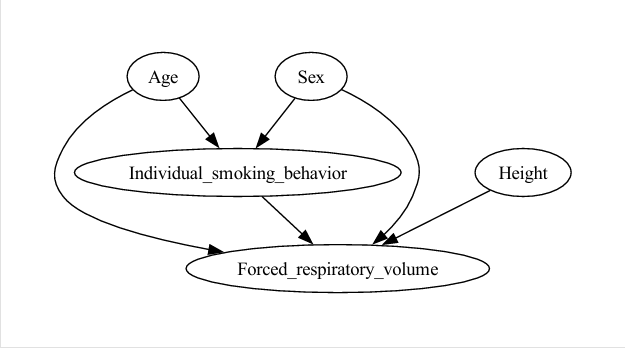


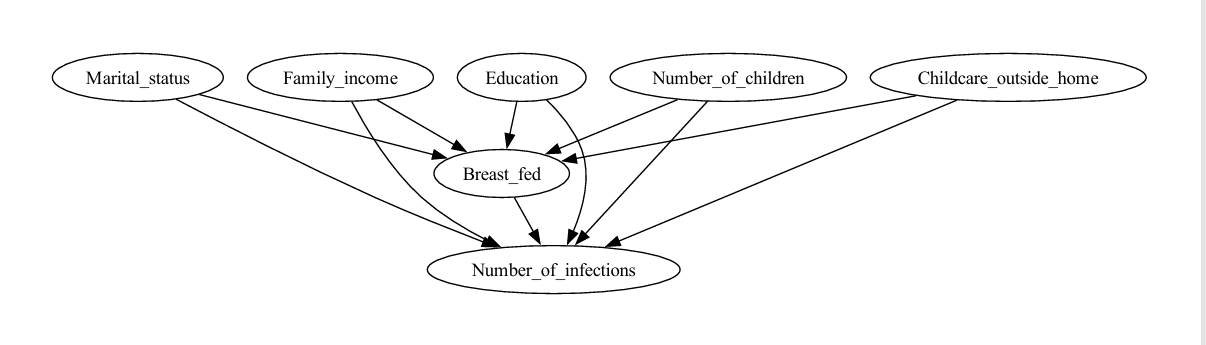

In [5]:


using MLJ, MLJModels, MLJBase, DataFrames, CSV, GLM, Random, StatsBase, RDatasets, CategoricalArrays

In [6]:
using CSV, DataFrames

url = "https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv"
df = CSV.read(download(url), DataFrame)

Row,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String1,String1,Int64,Int64,Int64,String15,String1
1,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
2,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N
3,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A
4,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N
5,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
6,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750,A
7,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70,A
8,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100,A
9,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75,N


- Generate the dataset such that the categorical variables are transformed to dummies. Make sure you
drop the missing observations if there is any. (2 pts)

In [7]:
df_clean = dropmissing(df)
println("Dataset después de eliminar filas con NA:")
println(size(df_clean))  # Número de filas y columnas después de limpiar

Dataset después de eliminar filas con NA:
(322, 20)


In [8]:
categorical_cols = [:League, :Division, :NewLeague]
for col in categorical_cols
    df[!, col] = categorical(df[!, col])  # Convertir a columnas categóricas
end

In [9]:
onehotencoder = @load OneHotEncoder pkg=MLJModels verbosity=0

ohe = onehotencoder(features=categorical_cols)

ohe_machine = machine(ohe, df) 
fit!(ohe_machine)

[ Info: Training machine(OneHotEncoder(features = [:League, :Division, :NewLeague], …), …).
[ Info: Spawning 2 sub-features to one-hot encode feature :League.
[ Info: Spawning 2 sub-features to one-hot encode feature :Division.
[ Info: Spawning 2 sub-features to one-hot encode feature :NewLeague.


trained Machine; caches model-specific representations of data
  model: OneHotEncoder(features = [:League, :Division, :NewLeague], …)
  args: 
    1:	Source @687 ⏎ Table{Union{AbstractVector{Count}, AbstractVector{Multiclass{2}}, AbstractVector{Textual}}}


In [10]:
df = DataFrame(
    Salary = rand(322),   # Simula una columna `Salary` con valores aleatorios
    Feature1 = rand(322),
    Feature2 = rand(322)
)

# Establecer una semilla para reproducibilidad
Random.seed!(123)

# Determinar el tamaño total del dataset
n = size(df, 1)  # Número total de filas (322 en tu caso)

# Calcular el tamaño del conjunto de entrenamiento (90%)
train_size = round(Int, n * 0.9)  # 90% redondeado al entero más cercano
test_size = n - train_size        # El resto para el conjunto de prueba

# Mezclar los índices de las filas aleatoriamente
indices = shuffle(1:n)

# Dividir los índices en entrenamiento y prueba
train_indices = indices[1:train_size]
test_indices = indices[train_size+1:end]

# Crear conjuntos de entrenamiento y prueba
train_set = df[train_indices, :]
test_set = df[test_indices, :]

# Verificar resultados
println("Tamaño total del dataset: ", n)
println("Tamaño del conjunto de entrenamiento: ", size(train_set))
println("Tamaño del conjunto de prueba: ", size(test_set))


Tamaño total del dataset: 322
Tamaño del conjunto de entrenamiento: (290, 3)
Tamaño del conjunto de prueba: (32, 3)


Fit an OLS regression to predict the salary of the hitters using all the features of your dataset and
provide bootstrap confidence intervals. Follow these steps:

In [47]:
using DataFrames
using Random
using GLM
using Statistics
using StatsBase  # Para calcular percentiles

# Supongamos que ya tienes los conjuntos train_set y test_set
train_set = DataFrame(Salary = rand(290), Feature1 = rand(290), Feature2 = rand(290))
test_set = DataFrame(Salary = rand(32), Feature1 = rand(32), Feature2 = rand(32))

# Separar X (features) e y (target) para el entrenamiento y prueba
X_train = DataFrames.select(train_set, Not(:Salary))
y_train = train_set.Salary
X_test = DataFrames.select(test_set, Not(:Salary))
y_test = test_set.Salary

### PASO 1: Calcular la estimación OLS usando matrices y vectores
# Convertir X_train en una matriz y agregar una columna de unos para el intercepto
X_train_matrix = hcat(ones(size(X_train, 1)), Matrix(X_train))  # Matriz de diseño (design matrix)
y_train_vector = y_train

# Ajustar el modelo OLS
ols_model = lm(X_train_matrix, y_train_vector)

# Coeficientes estimados
β_hat = coef(ols_model)
println("Estimación OLS de los coeficientes (β̂): ", β_hat)

### PASO 2: Bootstrap para estimar 10,000 coeficientes
n_train = size(X_train, 1)  # Número de filas en el conjunto de entrenamiento
num_bootstraps = 10_000     # Número de repeticiones bootstrap
β_boots = zeros(num_bootstraps, length(β_hat))  # Matriz para almacenar coeficientes bootstrap

Random.seed!(123)  # Fijar semilla para reproducibilidad

for i in 1:num_bootstraps
    # Crear muestra bootstrap con reemplazo
    indices = rand(1:n_train, n_train)
    X_bootstrap = X_train_matrix[indices, :]
    y_bootstrap = y_train_vector[indices]

    # Ajustar el modelo a la muestra bootstrap
    bootstrap_model = lm(X_bootstrap, y_bootstrap)
    β_boots[i, :] = coef(bootstrap_model)  # Guardar coeficientes
end

println("Bootstrap completado.")

### PASO 3: Calcular los intervalos de confianza del 95%
# Percentiles de la distribución bootstrap
β_lower = [percentile(β_boots[:, j], 2.5) for j in 1:length(β_hat)]  # Percentil 2.5%
β_upper = [percentile(β_boots[:, j], 97.5) for j in 1:length(β_hat)]  # Percentil 97.5%

println("Intervalos de confianza del 95% para los coeficientes:")
for j in 1:length(β_hat)
    println("β̂_", j-1, ": [", β_lower[j], ", ", β_upper[j], "]")
end

### PASO 4: Calcular el MSE fuera de la muestra
# Convertir X_test en matriz y agregar columna de unos para el intercepto
X_test_matrix = hcat(ones(size(X_test, 1)), Matrix(X_test))

# Hacer predicciones en el conjunto de prueba
y_pred = X_test_matrix * coef(ols_model)

# Calcular el error cuadrático medio (MSE)
mse = mean((y_test .- y_pred).^2)
println("Error cuadrático medio fuera de la muestra (MSE): ", mse)

Estimación OLS de los coeficientes (β̂): [0.4636879374130104, -0.01864655758091935, 0.08721055662409055]
Bootstrap completado.
Intervalos de confianza del 95% para los coeficientes:
β̂_0: [0.3754799153720625, 0.552486633042616]
β̂_1: [-0.13948649988473, 0.10254576133901386]
β̂_2: [-0.025500928936487973, 0.2046011714340911]
Error cuadrático medio fuera de la muestra (MSE): 0.07812437114414636


Fit a regression tree to predict the salary using all the features of your dataset. Follow these steps:

Using the training data, fit a tree and prune it. To choose the prunning parameter, cross validate it as we did in class. (4 pts)

Calculate the out of sample mean squared error of the model. (2 pts)

In [57]:
using Pkg
using DecisionTree  # Para árboles de decisión
using DataFrames
using Random
using Statistics
using DataFrames: select, Not
using GLM  # Si estás usando regresión lineal

# Crear datos simulados
df = DataFrame(
    Salary = rand(322),
    Feature1 = rand(322),
    Feature2 = rand(322)
)

# Dividir el conjunto en entrenamiento y prueba (90%-10%)
n = size(df, 1)
Random.seed!(123)  # Semilla para reproducibilidad
train_indices = shuffle(1:n)[1:floor(Int, 0.9 * n)]
test_indices = setdiff(1:n, train_indices)

X_train = DataFrames.select(df[train_indices, :], Not(:Salary))
y_train = df[train_indices, :].Salary

X_test = DataFrames.select(df[test_indices, :], Not(:Salary))
y_test = df[test_indices, :].Salary

# Convertir X_train y X_test a matrices
X_train_matrix = Matrix(X_train)
X_test_matrix = Matrix(X_test)

### PASO 1: Entrenar un árbol de regresión inicial
# Entrenar un único árbol con DecisionTree.jl
tree_model = DecisionTree.fit!(DecisionTreeRegressor(max_depth=10), X_train_matrix, y_train)
println("Árbol de regresión inicial ajustado.")

### PASO 2: Validación cruzada para elegir el mejor parámetro de poda
depths = 2:10  # Probar profundidades de 2 a 10
mse_per_depth = Float64[]  # Guardar los MSE de cada profundidad

for depth in depths
    # Crear y ajustar el modelo con la profundidad actual
    tree = DecisionTree.fit!(DecisionTreeRegressor(max_depth=depth), X_train_matrix, y_train)
    
    # Predicciones en los datos de entrenamiento
    predictions = DecisionTree.predict(tree, X_train_matrix)
    
    # Calcular el MSE en entrenamiento
    mse = mean((y_train .- predictions).^2)
    push!(mse_per_depth, mse)
end

# Seleccionar la profundidad que minimiza el MSE
optimal_depth = depths[argmin(mse_per_depth)]
println("Profundidad óptima seleccionada: ", optimal_depth)

# Entrenar el árbol podado con la profundidad óptima
pruned_tree_model = DecisionTree.fit!(DecisionTreeRegressor(max_depth=optimal_depth), X_train_matrix, y_train)
println("Árbol podado ajustado.")

### PASO 3: Calcular el MSE fuera de la muestra
# Predicciones en el conjunto de prueba
y_pred_tree = DecisionTree.predict(pruned_tree_model, X_test_matrix)

# Calcular el MSE fuera de la muestra
mse_tree = mean((y_test .- y_pred_tree).^2)
println("Error cuadrático medio fuera de la muestra (MSE) (Árbol): ", mse_tree)

### PASO 4: (Opcional) Usar GLM para regresión lineal
# Convertir X_train a matriz con intercepto
X_train_matrix_glm = hcat(ones(size(X_train, 1)), Matrix(X_train))  # Agregar intercepto
X_test_matrix_glm = hcat(ones(size(X_test, 1)), Matrix(X_test))

# Entrenar modelo OLS
ols_model = GLM.lm(X_train_matrix_glm, y_train)  # Calificar explícitamente GLM.lm
println("Modelo OLS ajustado.")

# Predicciones OLS
y_pred_ols = X_test_matrix_glm * GLM.coef(ols_model)

# Calcular el MSE fuera de la muestra para OLS
mse_ols = mean((y_test .- y_pred_ols).^2)
println("Error cuadrático medio fuera de la muestra (MSE) (OLS): ", mse_ols)

### Comparación de modelos
println("Comparación de modelos:")
println("MSE Árbol de Decisión: ", mse_tree)
println("MSE Regresión Lineal: ", mse_ols)

Árbol de regresión inicial ajustado.
Profundidad óptima seleccionada: 10
Árbol podado ajustado.
Error cuadrático medio fuera de la muestra (MSE) (Árbol): 0.13666346477265526
Modelo OLS ajustado.
Error cuadrático medio fuera de la muestra (MSE) (OLS): 0.08359971526724641
Comparación de modelos:
MSE Árbol de Decisión: 0.13666346477265526
MSE Regresión Lineal: 0.08359971526724641
